In [1]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
# 📂 Paths
base_path = "../llm_test_data/"

guided_path = os.path.join(base_path, "outputs_guided.csv")
partial_guided_path = os.path.join(base_path, "outputs_partial_guided.csv")
unguided_path = os.path.join(base_path, "outputs_unguided.csv")
agentic_path = os.path.join(base_path, "outputs_agentic.csv")

# 📥 Load all datasets
guided_df = pd.read_csv(guided_path)
partial_guided_df = pd.read_csv(partial_guided_path)
unguided_df = pd.read_csv(unguided_path)
agentic_df = pd.read_csv(agentic_path)

# 🏷️ Add method labels
guided_df['method'] = 'guided'
partial_guided_df['method'] = 'partial_guided'
unguided_df['method'] = 'unguided'
agentic_df['method'] = 'agentic'

# 📊 Combine all into a single DataFrame
all_df = pd.concat([guided_df, partial_guided_df, unguided_df, agentic_df], ignore_index=True)

# 🚿 Clean column types
numeric_cols = ['calories', 'protein_g', 'carbs_g', 'fats_g']
for col in numeric_cols:
    all_df[col] = pd.to_numeric(all_df[col], errors='coerce')

In [3]:
# 📋 Quick overview
all_df.head()


,user_id,mode,meal_type,meal_name,calories,protein_g,carbs_g,fats_g,rationale,method
0,66,guided,unknown,Greek Yogurt Parfait with Gluten-Free Granola,500.00,30.00,65.0,15.00,This breakfast is high in protein and healthy ...,guided
1,66,guided,unknown,Medjool Dates and Almond Butter,300.00,8.00,40.0,14.00,This snack is rich in healthy fats and protein...,guided
2,66,guided,unknown,Grilled Salmon Salad,700.00,50.00,20.0,30.00,"This lunch is high in Omega-3 fatty acids, whi...",guided
3,66,guided,unknown,Hummus and Carrot Sticks,200.00,10.00,25.0,8.00,Hummus is a good source of plant protein and f...,guided
4,66,guided,unknown,Quinoa Stuffed Bell Peppers,943.52,100.26,147.4,6.43,Quinoa is a complete protein and a great sourc...,guided


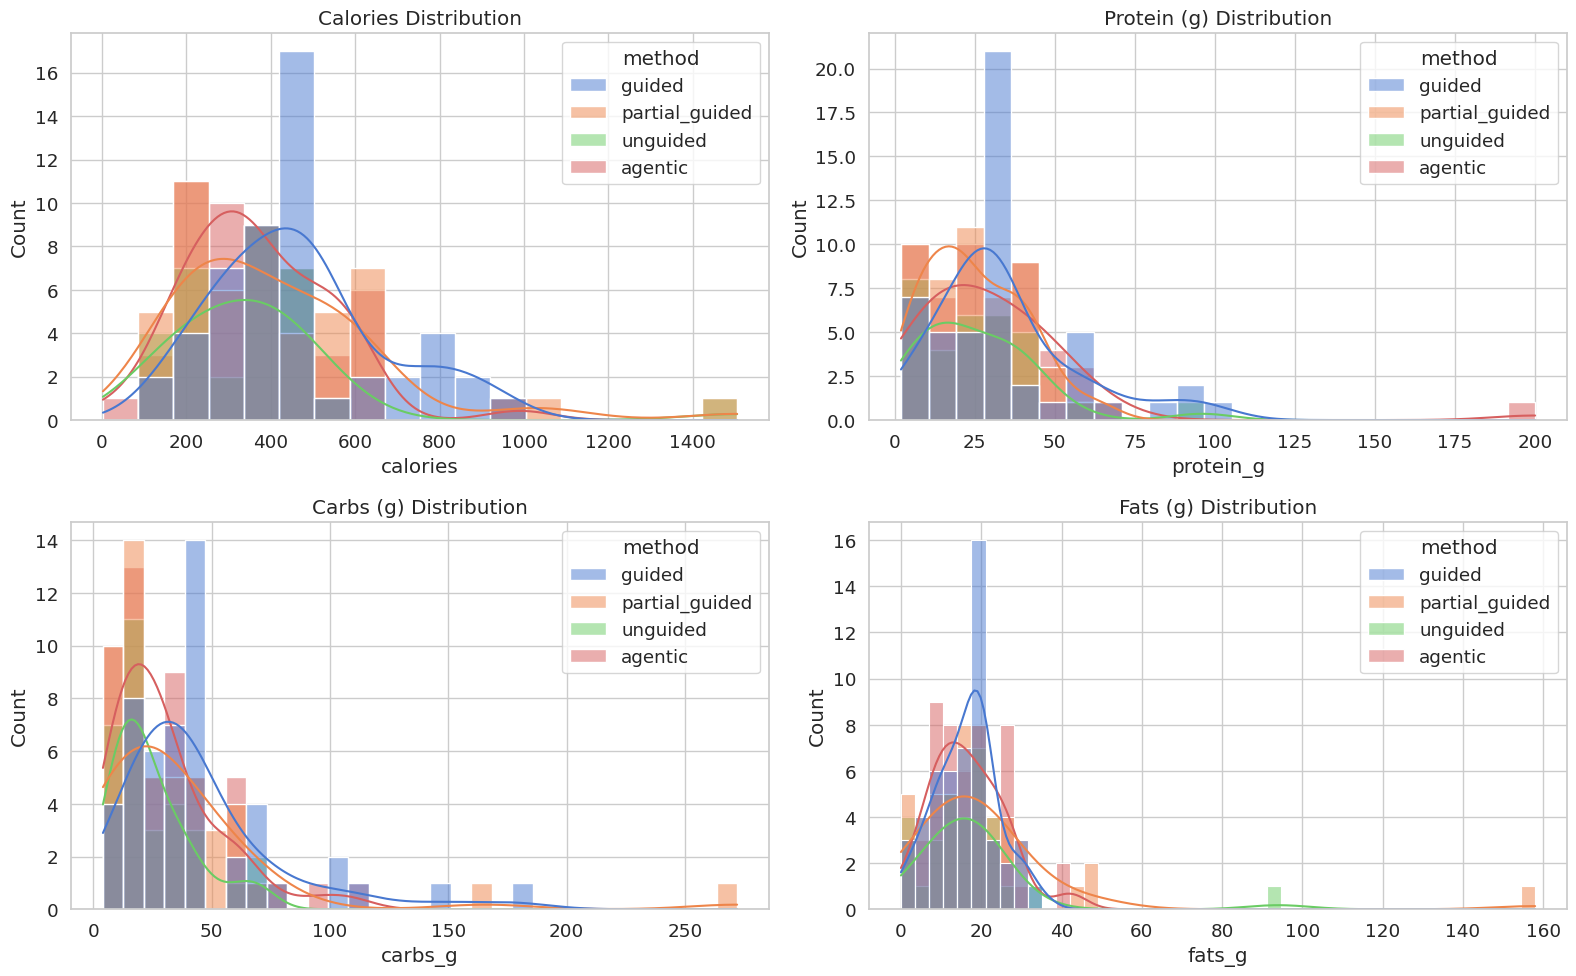

In [4]:
# 🎨 Set plot style
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# 📊 Compare distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

sns.histplot(data=all_df, x="calories", hue="method", kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Calories Distribution")

sns.histplot(data=all_df, x="protein_g", hue="method", kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Protein (g) Distribution")

sns.histplot(data=all_df, x="carbs_g", hue="method", kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Carbs (g) Distribution")

sns.histplot(data=all_df, x="fats_g", hue="method", kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Fats (g) Distribution")

plt.tight_layout()
plt.show()


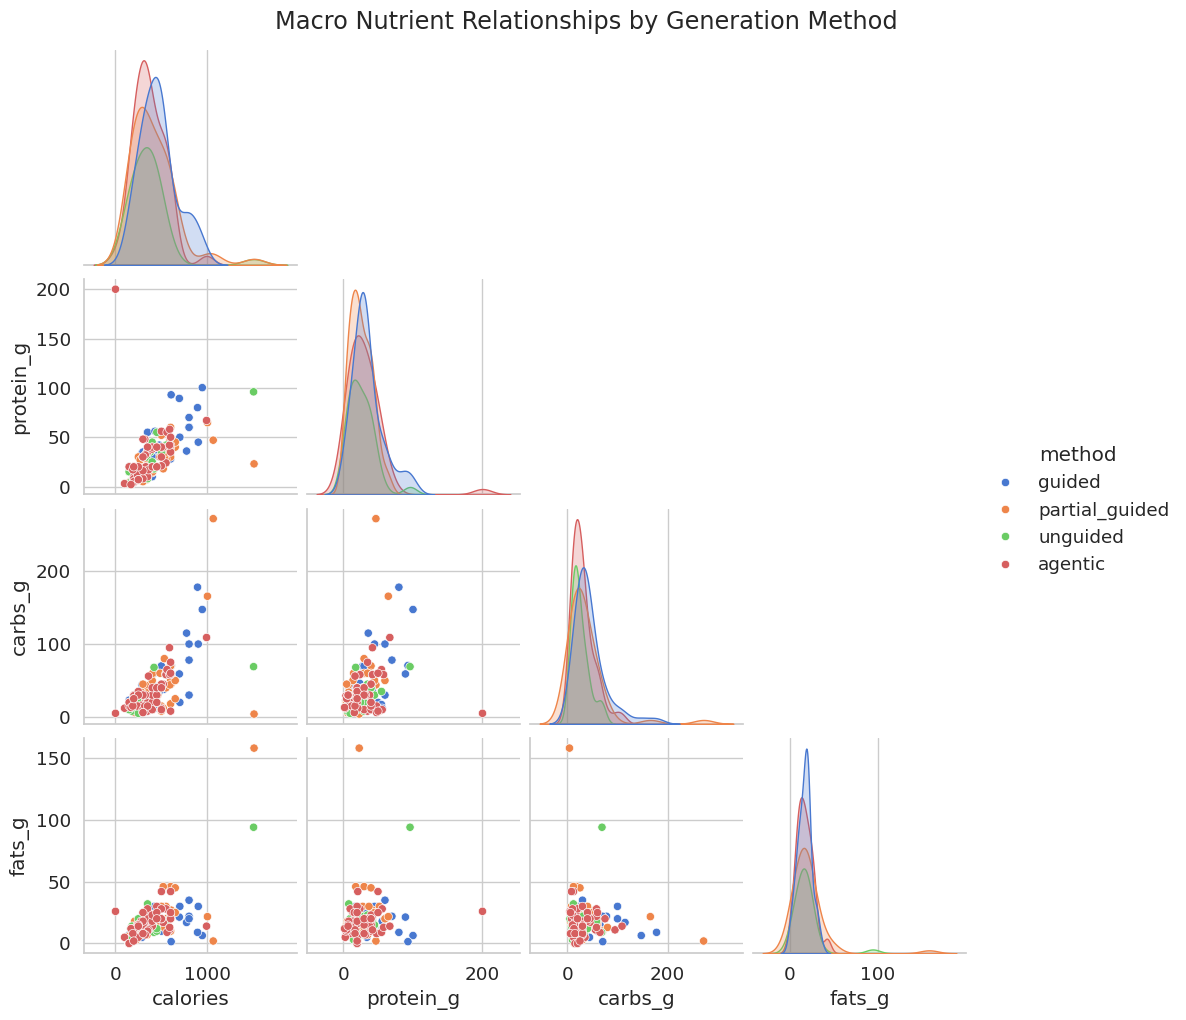

In [5]:
# 📈 Pairplot
pairplot_df = all_df.copy()
pairplot_df = pairplot_df.dropna(subset=['calories', 'protein_g', 'carbs_g', 'fats_g'])

sns.pairplot(pairplot_df, vars=['calories', 'protein_g', 'carbs_g', 'fats_g'], hue="method", diag_kind="kde", corner=True, height=2.5)
plt.suptitle("Macro Nutrient Relationships by Generation Method", y=1.02)
plt.show()


In [6]:
# 📋 Summary stats
summary = all_df.groupby('method')[['calories', 'protein_g', 'carbs_g', 'fats_g']].agg(['mean', 'std', 'min', 'max'])
summary


calories                              protein_g             \
                      mean         std    min      max       mean        std   
method                                                                         
agentic         367.372549  173.112791    2.0   990.00  30.647059  29.277174   
guided          464.643725  198.930492  150.0   943.52  34.560588  22.221024   
partial_guided  415.732600  256.373060  150.0  1505.00  25.276000  15.422109   
unguided        361.774194  242.543977  150.0  1500.00  25.709677  19.159321   

                               carbs_g                             fats_g  \
                min     max       mean        std   min    max       mean   
method                                                                      
agentic         2.0  200.00  30.372549  22.598195   5.0  109.0  16.431373   
guided          4.0  100.26  44.489412  33.679602  10.0  178.0  16.299412   
partial_guided  4.0   64.80  36.092000  43.322883   4.0  272.0  20.034000   
unguided        2.0   96.00  24.838710  17.002150   5.0   69.0  17.677419   

                                       
                      std  min    max  
method                                 
agentic          9.230937  0.0   42.0  
guided           7.717740  0.0   35.0  
partial_guided  22.553715  0.0  158.0  
unguided        15.814312  3.0   94.0

In [7]:
# 📂 Paths
base_path = "../llm_test_data/"

guided_path = os.path.join(base_path, "outputs_guided.csv")
partial_guided_path = os.path.join(base_path, "outputs_partial_guided.csv")
unguided_path = os.path.join(base_path, "outputs_unguided.csv")
agentic_path = os.path.join(base_path, "outputs_agentic.csv")

# 📥 Load all datasets
guided_df = pd.read_csv(guided_path)
partial_guided_df = pd.read_csv(partial_guided_path)
unguided_df = pd.read_csv(unguided_path)
agentic_df = pd.read_csv(agentic_path)

# 🏷️ Add method labels
guided_df['method'] = 'guided'
partial_guided_df['method'] = 'partial_guided'
unguided_df['method'] = 'unguided'
agentic_df['method'] = 'agentic'

# 📊 Combine all into a single DataFrame
all_df = pd.concat([guided_df, partial_guided_df, unguided_df, agentic_df], ignore_index=True)

# 🚿 Clean numeric columns
numeric_cols = ['calories', 'protein_g', 'carbs_g', 'fats_g']
for col in numeric_cols:
    all_df[col] = pd.to_numeric(all_df[col], errors='coerce')

In [8]:
# 📊 Group by user and method, sum over their day's meals
userwise_totals = all_df.groupby(['user_id', 'method']).agg({
    'calories': 'sum',
    'protein_g': 'sum',
    'carbs_g': 'sum',
    'fats_g': 'sum'
}).reset_index()

# 📋 Quick look
userwise_totals.head()


,user_id,method,calories,protein_g,carbs_g,fats_g
0,66,agentic,2000.00,130.00,166.0,87.00
1,66,guided,2643.52,198.26,297.4,73.43
2,66,partial_guided,1911.00,129.00,138.0,95.00
3,66,unguided,1770.00,125.00,189.0,60.00
4,354,agentic,1620.00,107.00,95.0,98.00


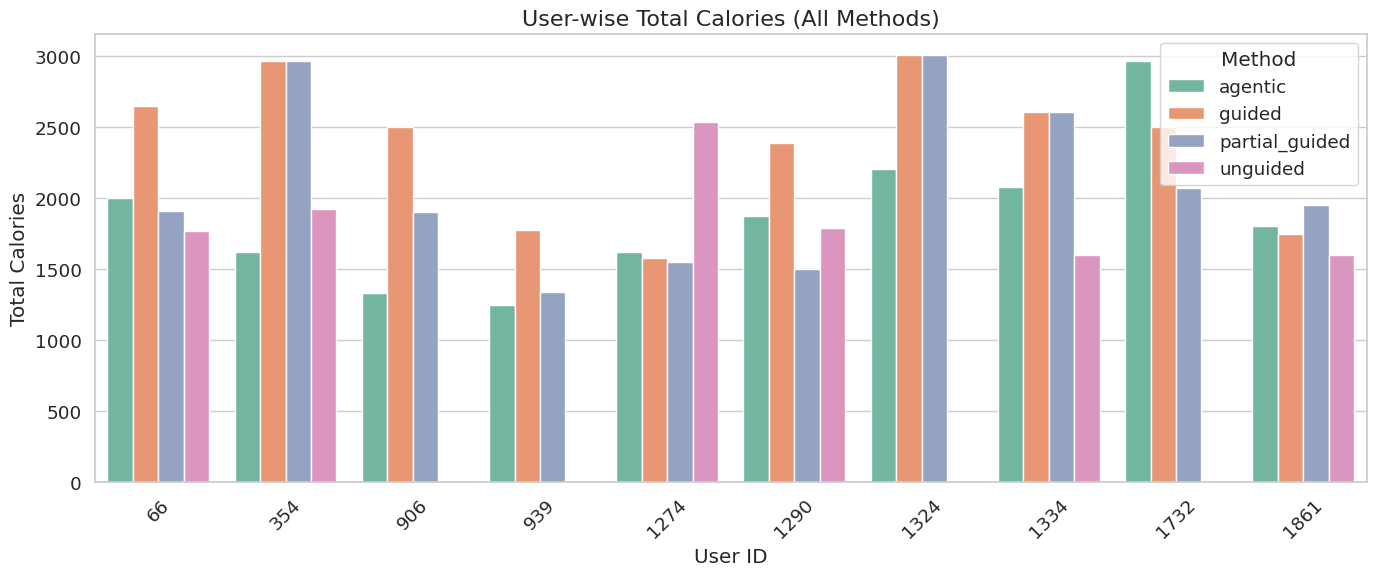

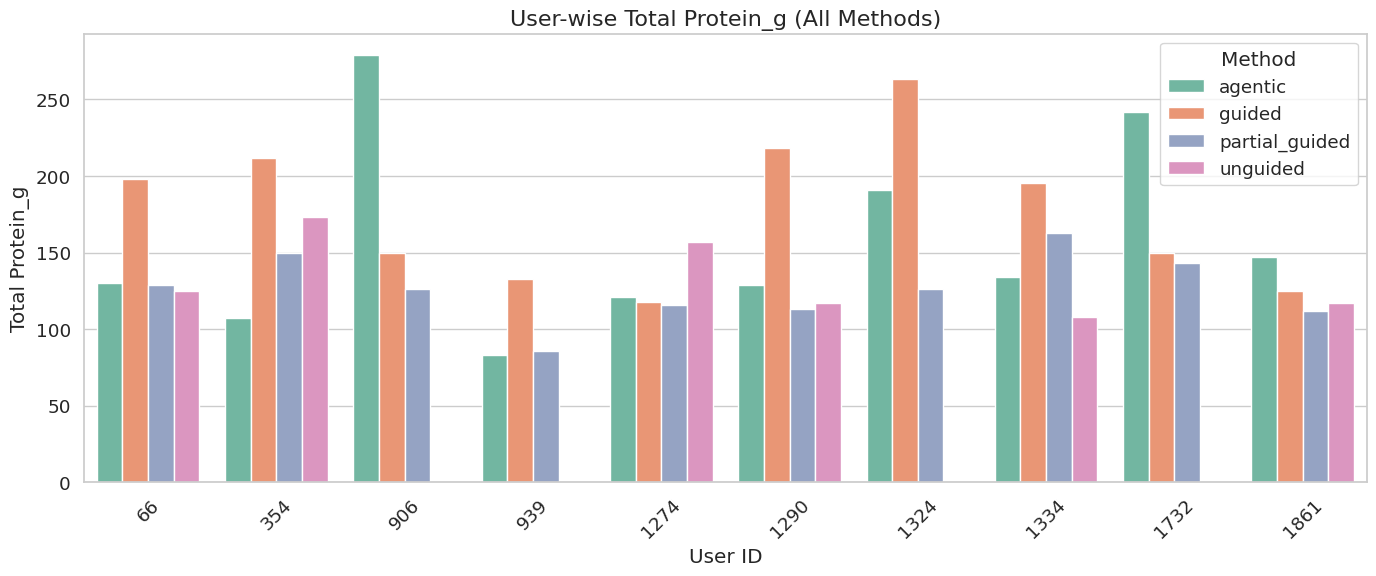

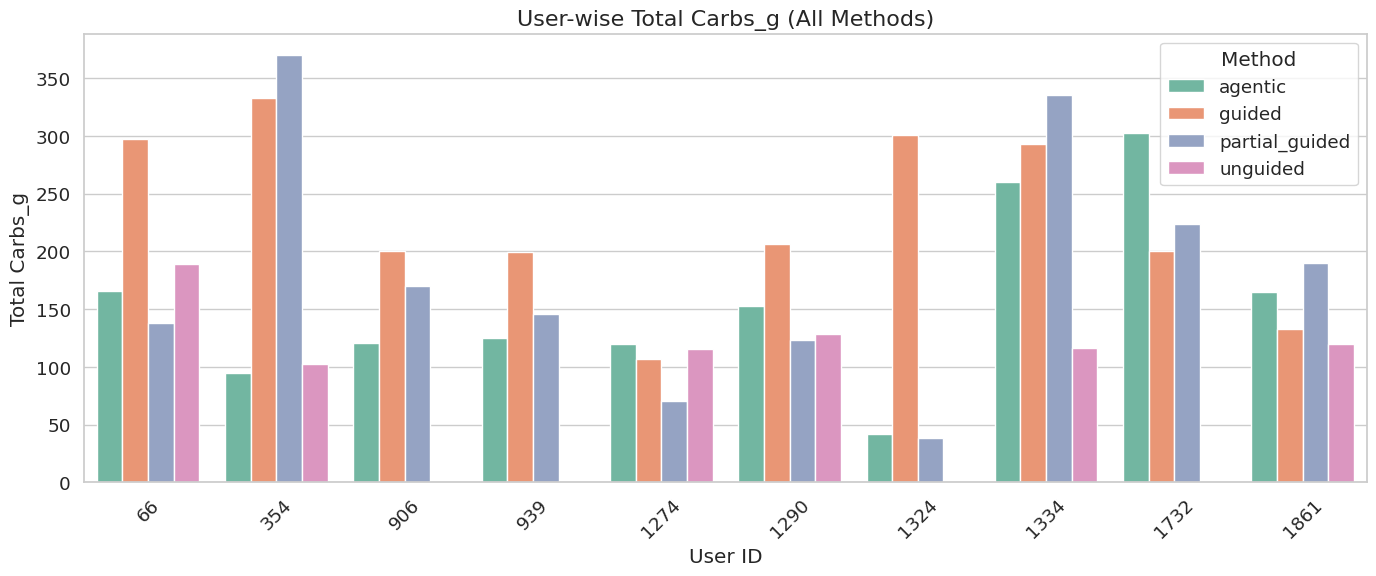

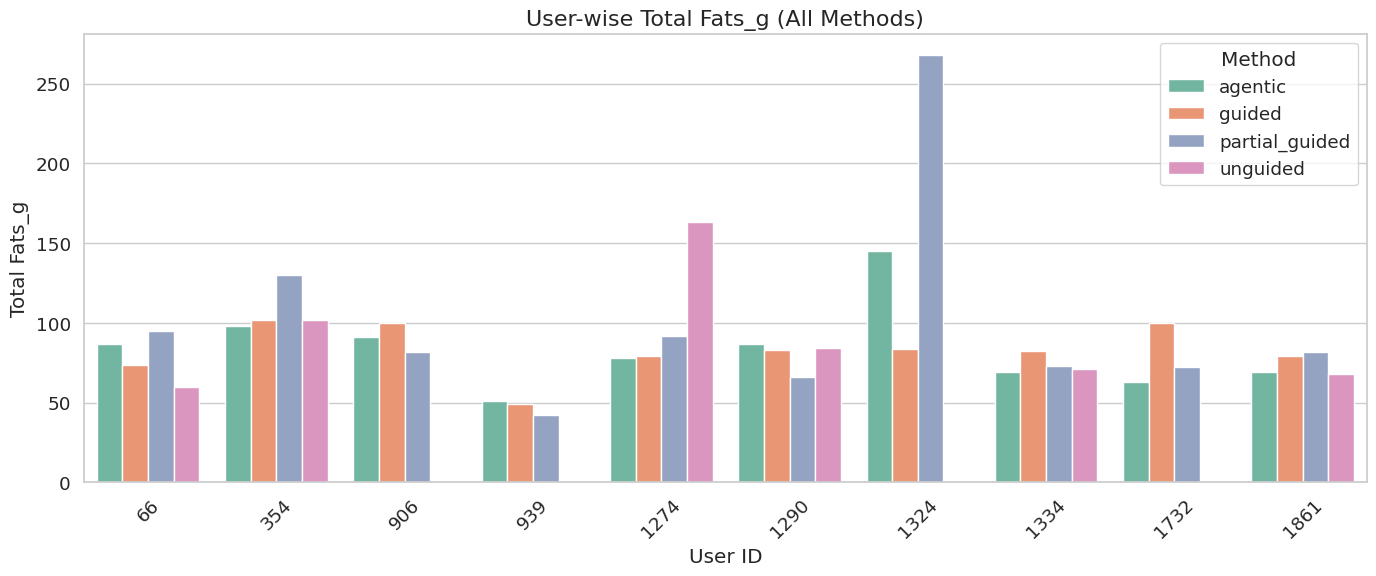

In [9]:
# 🎨 Set plot style
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# 📋 List of macro nutrients
macro_cols = ['calories', 'protein_g', 'carbs_g', 'fats_g']

# 🎯 Plot userwise totals for each macro
for macro in macro_cols:
    plt.figure(figsize=(14, 6))
    sns.barplot(
        data=userwise_totals,
        x="user_id", y=macro, hue="method",
        palette="Set2"
    )
    plt.title(f"User-wise Total {macro.capitalize()} (All Methods)", fontsize=16)
    plt.xlabel("User ID")
    plt.ylabel(f"Total {macro.capitalize()}")
    plt.legend(title="Method")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Paths
base_path = "../llm_test_data/"

guided_df = pd.read_csv(os.path.join(base_path, "outputs_guided.csv"))
partial_guided_df = pd.read_csv(os.path.join(base_path, "outputs_partial_guided.csv"))
unguided_df = pd.read_csv(os.path.join(base_path, "outputs_unguided.csv"))
agentic_df = pd.read_csv(os.path.join(base_path, "outputs_agentic.csv"))

# Add method labels
guided_df['method'] = 'guided'
partial_guided_df['method'] = 'partial_guided'
unguided_df['method'] = 'unguided'
agentic_df['method'] = 'agentic'

# Combine all
all_df = pd.concat([guided_df, partial_guided_df, unguided_df, agentic_df], ignore_index=True)

# Clean numeric
for col in ['calories', 'protein_g', 'carbs_g', 'fats_g']:
    all_df[col] = pd.to_numeric(all_df[col], errors='coerce')


In [27]:
# Group totals
userwise_totals = all_df.groupby(['user_id', 'method']).agg({
    'calories': 'sum',
    'protein_g': 'sum',
    'carbs_g': 'sum',
    'fats_g': 'sum'
}).reset_index()

new_userwise_totals = userwise_totals.copy()


In [12]:
# Fixed 10 users list
fixed_user_ids = ['1861', '354', '1334', '906', '1290', '1274', '939', '1732', '66', '1324']

# 📥 Load target values
targets_df = pd.read_csv("../data/user_nutrition_targets.csv", dtype={'user_id': str})

# 📦 Rename columns properly to match output files
targets_df = targets_df.rename(columns={
    "optimal_calories": "calories",
    "protein_g": "protein_g",
    "carbs_g": "carbs_g",
    "fat_g": "fats_g"
})

# 🎯 Add 'method' = 'target'
targets_df['method'] = 'target'

# 📋 Select only necessary columns
targets_long = targets_df[['user_id', 'method', 'calories', 'protein_g', 'carbs_g', 'fats_g']]

# 🔍 Filter only fixed users
targets_long = targets_long[targets_long['user_id'].isin(fixed_user_ids)]

# 🚿 Clean types if needed
for col in ['calories', 'protein_g', 'carbs_g', 'fats_g']:
    targets_long[col] = pd.to_numeric(targets_long[col], errors='coerce')

# 📋 Confirm
targets_long


,user_id,method,calories,protein_g,carbs_g,fats_g
65,66,target,2643.52,198.26,297.40,73.43
353,354,target,2962.15,222.16,333.24,82.28
905,906,target,2219.85,166.49,249.73,61.66
938,939,target,1773.20,132.99,199.49,49.26
1273,1274,target,1577.38,118.30,177.46,43.82
1289,1290,target,2388.42,179.13,268.70,66.34
1323,1324,target,3005.63,262.99,300.56,83.49
1333,1334,target,2604.48,195.34,293.00,72.35
1731,1732,target,2611.54,228.51,261.15,72.54
1860,1861,target,2143.29,160.75,187.54,83.35


In [14]:
# Merge model outputs + targets
userwise_plot_df = pd.concat([userwise_totals, targets_long], ignore_index=True, sort=False)

# Re-clean numeric
for col in ['calories', 'protein_g', 'carbs_g', 'fats_g']:
    userwise_plot_df[col] = pd.to_numeric(userwise_plot_df[col], errors='coerce')

userwise_plot_df.head()

,user_id,method,calories,protein_g,carbs_g,fats_g
0,66,agentic,2000.00,130.00,166.0,87.00
1,66,guided,2643.52,198.26,297.4,73.43
2,66,partial_guided,1911.00,129.00,138.0,95.00
3,66,unguided,1770.00,125.00,189.0,60.00
4,354,agentic,1620.00,107.00,95.0,98.00


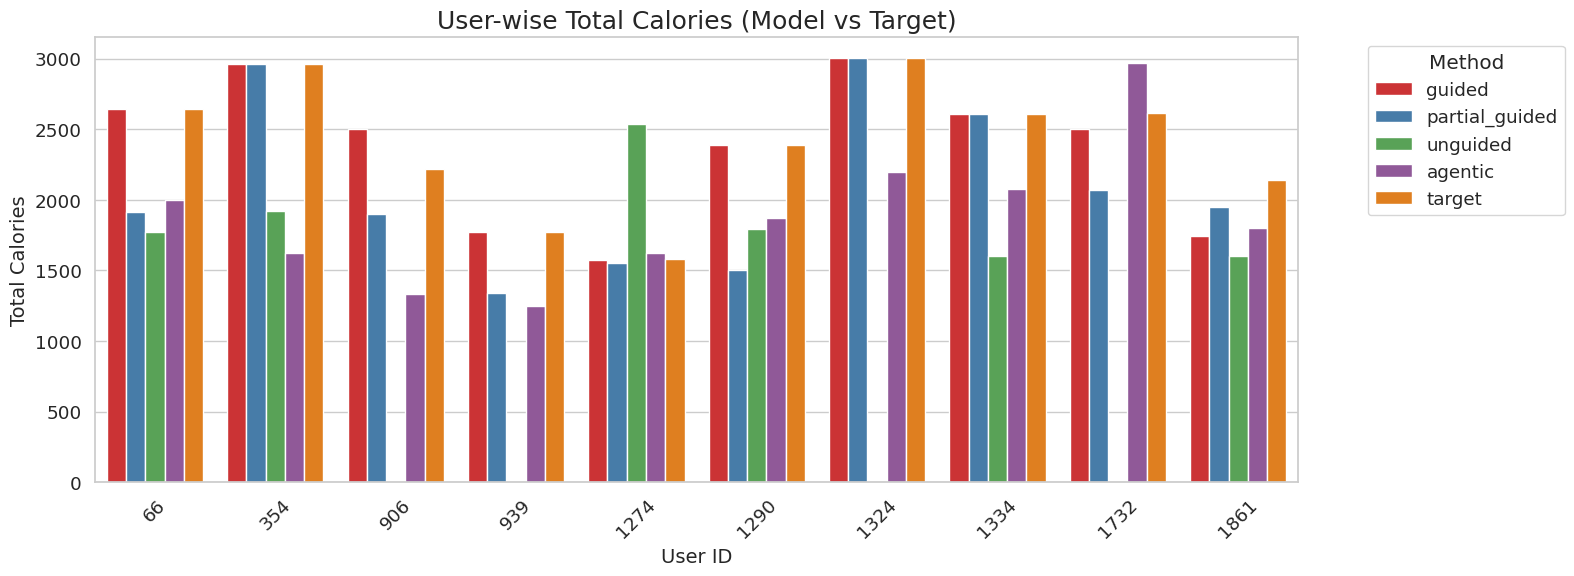

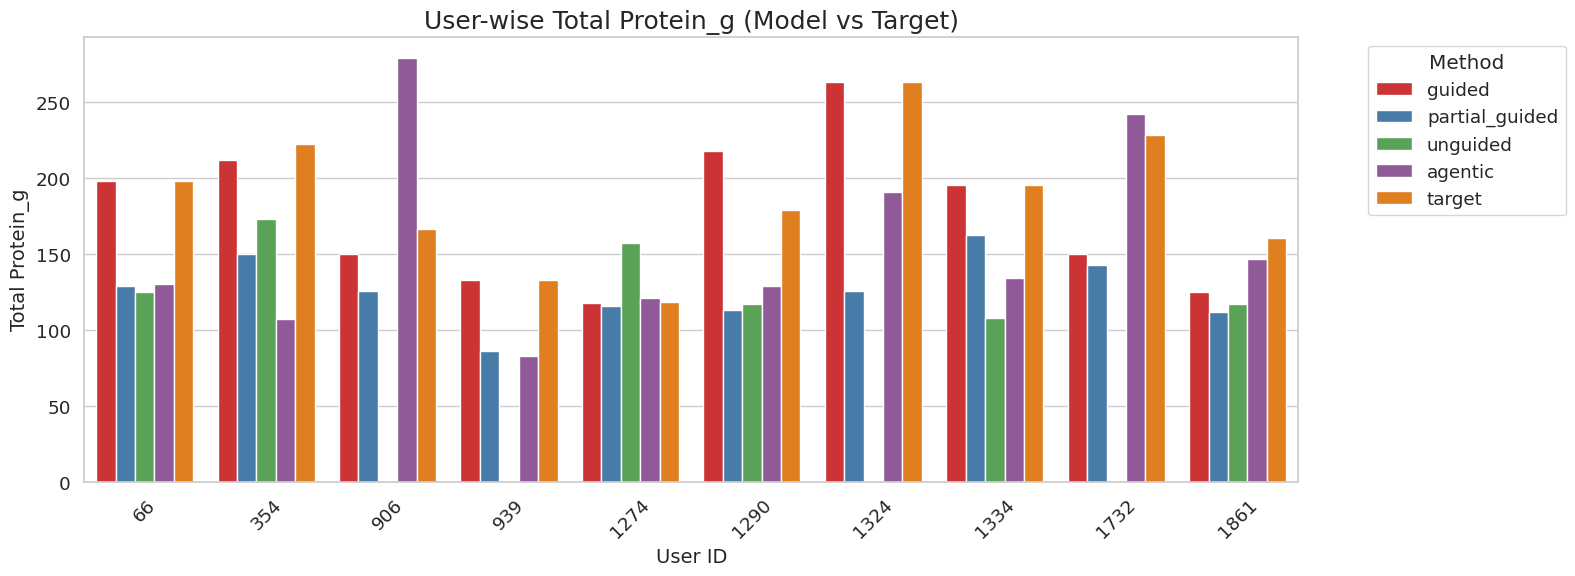

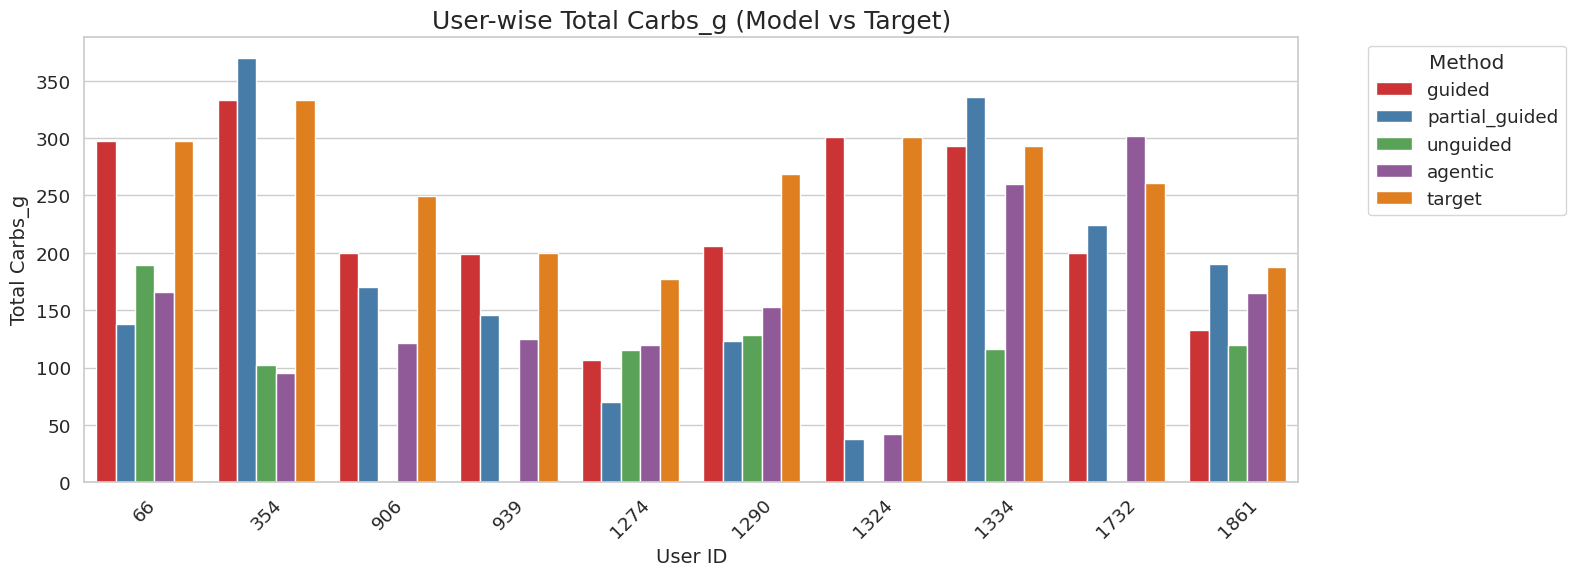

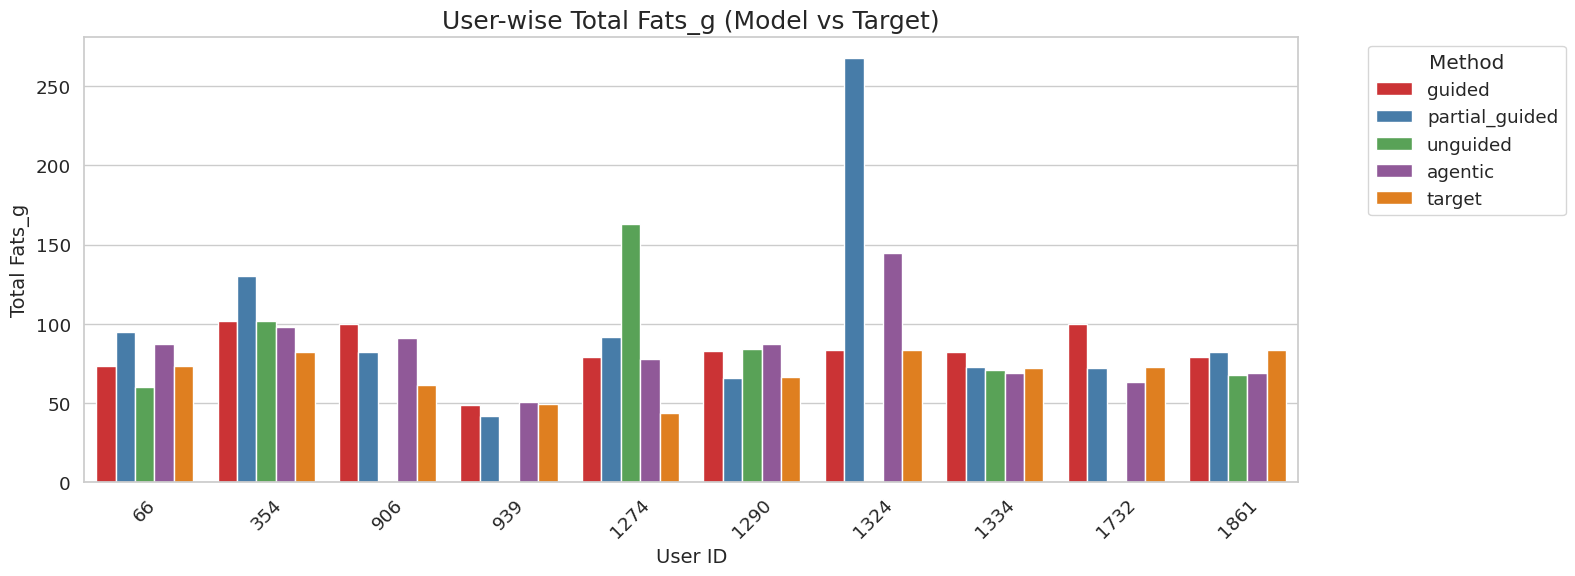

In [15]:
# 🎨 Plot settings
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

# Macro columns
macro_cols = ['calories', 'protein_g', 'carbs_g', 'fats_g']

# Ensure full user-method grid
methods = ['guided', 'partial_guided', 'unguided', 'agentic', 'target']
user_ids = userwise_plot_df['user_id'].unique()

full_index = pd.MultiIndex.from_product(
    [user_ids, methods], names=['user_id', 'method']
)

userwise_plot_complete = userwise_plot_df.set_index(['user_id', 'method']).reindex(full_index).reset_index()

# 🎯 Now plot
for macro in macro_cols:
    plt.figure(figsize=(16, 6))
    sns.barplot(
        data=userwise_plot_complete,
        x="user_id", y=macro, hue="method",
        palette="Set1", dodge=True
    )
    plt.title(f"User-wise Total {macro.capitalize()} (Model vs Target)", fontsize=18)
    plt.xlabel("User ID", fontsize=14)
    plt.ylabel(f"Total {macro.capitalize()}", fontsize=14)
    plt.legend(title="Method", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [35]:
new_userwise_totals

,user_id,method,calories,protein_g,carbs_g,fats_g
0,66,agentic,2000.00,130.00,166.00,87.00
1,66,guided,2643.52,198.26,297.40,73.43
2,66,partial_guided,1911.00,129.00,138.00,95.00
3,66,unguided,1770.00,125.00,189.00,60.00
4,354,agentic,1620.00,107.00,95.00,98.00
5,354,guided,2962.00,212.00,333.00,102.00
6,354,partial_guided,2962.15,150.00,370.00,130.00
7,354,unguided,1920.00,173.00,102.00,102.00
8,906,agentic,1332.00,279.00,121.00,91.00
9,906,guided,2500.00,150.00,200.00,100.00


In [34]:
targets_long

,user_id,method,calories,protein_g,carbs_g,fats_g
65,66,target,2643.52,198.26,297.40,73.43
353,354,target,2962.15,222.16,333.24,82.28
905,906,target,2219.85,166.49,249.73,61.66
938,939,target,1773.20,132.99,199.49,49.26
1273,1274,target,1577.38,118.30,177.46,43.82
1289,1290,target,2388.42,179.13,268.70,66.34
1323,1324,target,3005.63,262.99,300.56,83.49
1333,1334,target,2604.48,195.34,293.00,72.35
1731,1732,target,2611.54,228.51,261.15,72.54
1860,1861,target,2143.29,160.75,187.54,83.35


In [36]:
macro_cols = ['calories', 'protein_g', 'carbs_g', 'fats_g']

# 📋 Set targets indexed by user_id
targets_df = targets_long.set_index('user_id')
predictions_df = new_userwise_totals.copy()

# ✏️ Make sure user_id is string
predictions_df['user_id'] = predictions_df['user_id'].astype(str)
targets_df.index = targets_df.index.astype(str)


In [37]:
error_rows = []

for idx, pred in predictions_df.iterrows():
    user_id = str(pred['user_id'])
    method = pred['method']
    
    if user_id not in targets_df.index:
        continue  # Skip if no target
    
    row = {'user_id': user_id, 'method': method}
    
    for macro in macro_cols:
        pred_val = pred.get(macro, np.nan)
        true_val = targets_df.loc[user_id].get(macro, np.nan)
        
        if pd.notnull(pred_val) and pd.notnull(true_val) and true_val != 0:
            pct_error = ((pred_val - true_val) / true_val) * 100
        else:
            pct_error = np.nan
        
        row[f'{macro}_error_pct'] = pct_error
    
    error_rows.append(row)

# 📋 Create DataFrame
error_df = pd.DataFrame(error_rows)

# Preview
error_df.head()


,user_id,method,calories_error_pct,protein_g_error_pct,carbs_g_error_pct,fats_g_error_pct
0,66,agentic,-24.343300,-34.429537,-44.182919,18.480185
1,66,guided,0.000000,0.000000,0.000000,0.000000
2,66,partial_guided,-27.710023,-34.933925,-53.597848,29.374915
3,66,unguided,-33.043820,-36.951478,-36.449227,-18.289527
4,354,agentic,-45.309994,-51.836514,-71.492018,19.105493


In [38]:
# 📊 Summarize mean absolute errors
summary = error_df.groupby('method').agg({
    'calories_error_pct': 'mean',
    'protein_g_error_pct': 'mean',
    'carbs_g_error_pct': 'mean',
    'fats_g_error_pct': 'mean'
}).round(2)

summary


,calories_error_pct,protein_g_error_pct,carbs_g_error_pct,fats_g_error_pct
method,,,,
agentic,-20.76,-14.34,-37.37,23.65
guided,-1.04,-4.96,-13.58,23.75
partial_guided,-13.55,-30.24,-30.18,43.42
unguided,-16.08,-22.16,-48.30,47.33


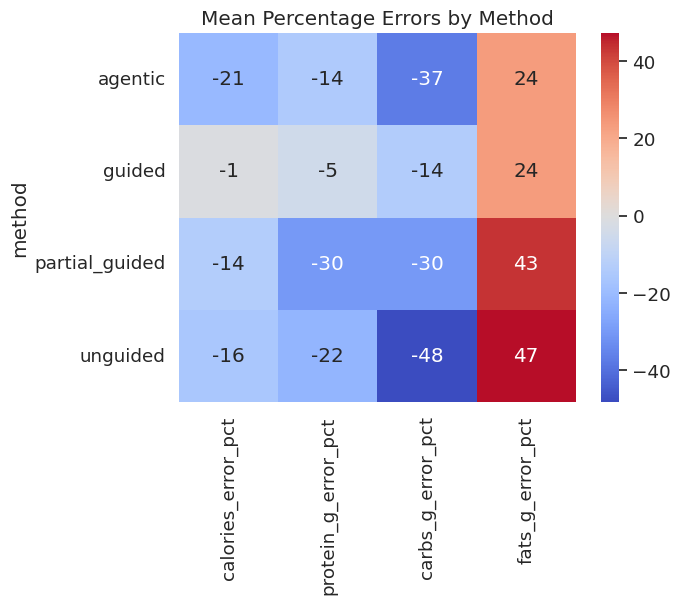

In [39]:
sns.heatmap(summary, annot=True, cmap="coolwarm", center=0)
plt.title("Mean Percentage Errors by Method")
plt.show()
